# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
my_cities=cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


# set up lists to hold reponse info

city_name= []
country = []
cloudiness = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

count=1

print(f"Beginning Data Retrieval")
print(f"------------------------")

# Loop through the list of cities and perform a request for data on each
for city in my_cities:
            
    try:
        response = requests.get(query_url + city).json()         
        country.append(response['sys']['country'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response["main"]['temp_max'])
        wind_speed.append(response["wind"]['speed'])
        
        print(f"Processing Record {count} | {city}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        count= count + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.5)
        
    # If no record found "skip" to next call
    except:
        print(f"{city} not found. Skipping...")
        time.sleep(1.5)
    continue
print(f"Data Retrieval Complete")



Beginning Data Retrieval
------------------------
Processing Record 1 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?&q=port elizabeth
Processing Record 2 | mokhsogollokh
http://api.openweathermap.org/data/2.5/weather?&q=mokhsogollokh
Processing Record 3 | yellowknife
http://api.openweathermap.org/data/2.5/weather?&q=yellowknife
barentsburg not found. Skipping...
Processing Record 4 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?&q=comodoro rivadavia
Processing Record 5 | albany
http://api.openweathermap.org/data/2.5/weather?&q=albany
Processing Record 6 | ilulissat
http://api.openweathermap.org/data/2.5/weather?&q=ilulissat
Processing Record 7 | jamestown
http://api.openweathermap.org/data/2.5/weather?&q=jamestown
Processing Record 8 | sangar
http://api.openweathermap.org/data/2.5/weather?&q=sangar
Processing Record 9 | vic
http://api.openweathermap.org/data/2.5/weather?&q=vic
Processing Record 10 | bluff
http://api.openweathermap.org/data/2.5/wea

Processing Record 88 | svetlaya
http://api.openweathermap.org/data/2.5/weather?&q=svetlaya
Processing Record 89 | hobart
http://api.openweathermap.org/data/2.5/weather?&q=hobart
Processing Record 90 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?&q=saint-philippe
tumannyy not found. Skipping...
Processing Record 91 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?&q=lavrentiya
Processing Record 92 | norman wells
http://api.openweathermap.org/data/2.5/weather?&q=norman wells
Processing Record 93 | upernavik
http://api.openweathermap.org/data/2.5/weather?&q=upernavik
Processing Record 94 | kavieng
http://api.openweathermap.org/data/2.5/weather?&q=kavieng
Processing Record 95 | sinnamary
http://api.openweathermap.org/data/2.5/weather?&q=sinnamary
Processing Record 96 | walvis bay
http://api.openweathermap.org/data/2.5/weather?&q=walvis bay
Processing Record 97 | gladstone
http://api.openweathermap.org/data/2.5/weather?&q=gladstone
utiroa not found. Skipping...


Processing Record 174 | mareeba
http://api.openweathermap.org/data/2.5/weather?&q=mareeba
Processing Record 175 | dicabisagan
http://api.openweathermap.org/data/2.5/weather?&q=dicabisagan
Processing Record 176 | vila velha
http://api.openweathermap.org/data/2.5/weather?&q=vila velha
amderma not found. Skipping...
Processing Record 177 | katsuura
http://api.openweathermap.org/data/2.5/weather?&q=katsuura
Processing Record 178 | black river
http://api.openweathermap.org/data/2.5/weather?&q=black river
Processing Record 179 | belawan
http://api.openweathermap.org/data/2.5/weather?&q=belawan
Processing Record 180 | naze
http://api.openweathermap.org/data/2.5/weather?&q=naze
Processing Record 181 | nenjiang
http://api.openweathermap.org/data/2.5/weather?&q=nenjiang
Processing Record 182 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?&q=beringovskiy
Processing Record 183 | craigieburn
http://api.openweathermap.org/data/2.5/weather?&q=craigieburn
Processing Record 184 | singara

Processing Record 259 | kodiak
http://api.openweathermap.org/data/2.5/weather?&q=kodiak
grand river south east not found. Skipping...
chagda not found. Skipping...
Processing Record 260 | hanting
http://api.openweathermap.org/data/2.5/weather?&q=hanting
Processing Record 261 | nuuk
http://api.openweathermap.org/data/2.5/weather?&q=nuuk
Processing Record 262 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?&q=ostrovnoy
Processing Record 263 | bubaque
http://api.openweathermap.org/data/2.5/weather?&q=bubaque
Processing Record 264 | victoria
http://api.openweathermap.org/data/2.5/weather?&q=victoria
Processing Record 265 | isangel
http://api.openweathermap.org/data/2.5/weather?&q=isangel
Processing Record 266 | vanimo
http://api.openweathermap.org/data/2.5/weather?&q=vanimo
Processing Record 267 | zhigansk
http://api.openweathermap.org/data/2.5/weather?&q=zhigansk
Processing Record 268 | prince george
http://api.openweathermap.org/data/2.5/weather?&q=prince george
Processing Rec

Processing Record 344 | pachino
http://api.openweathermap.org/data/2.5/weather?&q=pachino
Processing Record 345 | kachiry
http://api.openweathermap.org/data/2.5/weather?&q=kachiry
Processing Record 346 | barreirinhas
http://api.openweathermap.org/data/2.5/weather?&q=barreirinhas
Processing Record 347 | letterkenny
http://api.openweathermap.org/data/2.5/weather?&q=letterkenny
Processing Record 348 | dothan
http://api.openweathermap.org/data/2.5/weather?&q=dothan
Processing Record 349 | marsa matruh
http://api.openweathermap.org/data/2.5/weather?&q=marsa matruh
Processing Record 350 | kungurtug
http://api.openweathermap.org/data/2.5/weather?&q=kungurtug
Processing Record 351 | banjarmasin
http://api.openweathermap.org/data/2.5/weather?&q=banjarmasin
Processing Record 352 | hovd
http://api.openweathermap.org/data/2.5/weather?&q=hovd
Processing Record 353 | rudnogorsk
http://api.openweathermap.org/data/2.5/weather?&q=rudnogorsk
zolotinka not found. Skipping...
Processing Record 354 | linga

Processing Record 431 | coihaique
http://api.openweathermap.org/data/2.5/weather?&q=coihaique
Processing Record 432 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?&q=kruisfontein
Processing Record 433 | progreso
http://api.openweathermap.org/data/2.5/weather?&q=progreso
mutsamudu not found. Skipping...
Processing Record 434 | mastic beach
http://api.openweathermap.org/data/2.5/weather?&q=mastic beach
Processing Record 435 | daloa
http://api.openweathermap.org/data/2.5/weather?&q=daloa
toftir not found. Skipping...
Processing Record 436 | kichera
http://api.openweathermap.org/data/2.5/weather?&q=kichera
Processing Record 437 | yarada
http://api.openweathermap.org/data/2.5/weather?&q=yarada
Processing Record 438 | betlitsa
http://api.openweathermap.org/data/2.5/weather?&q=betlitsa
Processing Record 439 | san carlos de bariloche
http://api.openweathermap.org/data/2.5/weather?&q=san carlos de bariloche
Processing Record 440 | barra dos coqueiros
http://api.openweathermap.org

Processing Record 515 | soma
http://api.openweathermap.org/data/2.5/weather?&q=soma
Processing Record 516 | gunupur
http://api.openweathermap.org/data/2.5/weather?&q=gunupur
Processing Record 517 | mayor pablo lagerenza
http://api.openweathermap.org/data/2.5/weather?&q=mayor pablo lagerenza
Processing Record 518 | ahuimanu
http://api.openweathermap.org/data/2.5/weather?&q=ahuimanu
Processing Record 519 | ingham
http://api.openweathermap.org/data/2.5/weather?&q=ingham
Processing Record 520 | nyurba
http://api.openweathermap.org/data/2.5/weather?&q=nyurba
Processing Record 521 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?&q=mandalgovi
Processing Record 522 | esfahan
http://api.openweathermap.org/data/2.5/weather?&q=esfahan
Processing Record 523 | bayeux
http://api.openweathermap.org/data/2.5/weather?&q=bayeux
Processing Record 524 | beaupre
http://api.openweathermap.org/data/2.5/weather?&q=beaupre
Processing Record 525 | bokovskaya
http://api.openweathermap.org/data/2.5/we

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# create a data frame 
weather_dict = {
    "City": city_name,
    "Country": country,
    "Cloudiness": cloudiness,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lon": lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed   
    }
weather_data = pd.DataFrame(weather_dict)

#save dataframe to CSV file
weather_data.to_csv(output_data_file,index=False)

# display dataframe
weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 9 columns):
City          549 non-null object
Country       549 non-null object
Cloudiness    549 non-null int64
Date          549 non-null int64
Humidity      549 non-null int64
Lat           549 non-null float64
Lon           549 non-null float64
Max Temp      549 non-null float64
Wind Speed    549 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.7+ KB


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

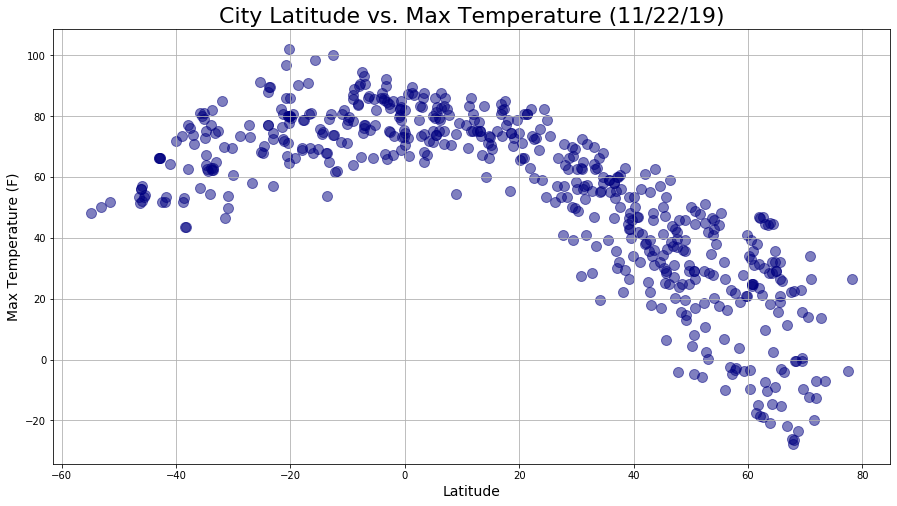

In [54]:
ax = weather_data.plot(kind='scatter', x="Lat", y= "Max Temp",
             color="navy",s=100,marker='o',alpha=.5, figsize=(15, 8)  )

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('City Latitude vs. Max Temperature (11/22/19)',fontsize= 22)
ax.set_xlabel("Latitude",fontsize= 14)
ax.set_ylabel("Max Temperature (F)",fontsize= 14)

fig_1 = ax.get_figure()
fig_1.savefig("output_data/max_temp.png")

#### Latitude vs. Humidity Plot

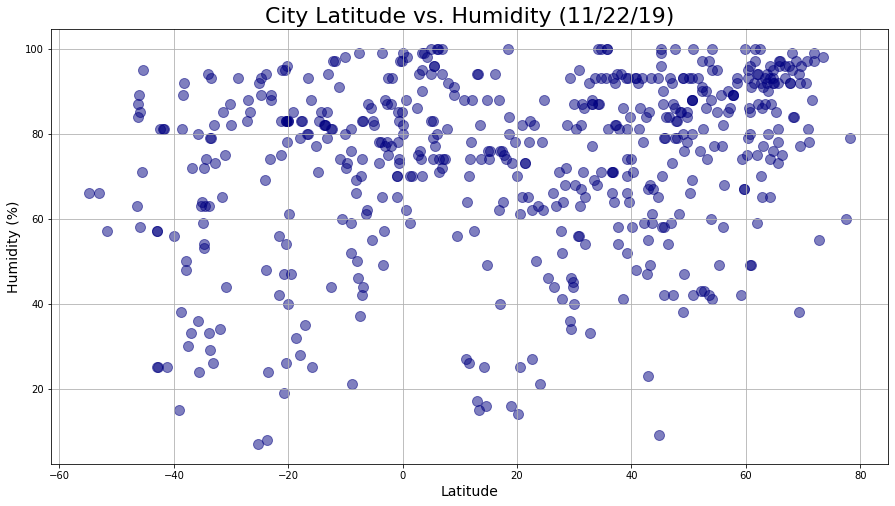

In [52]:
# create plot
ax = weather_data.plot(kind='scatter', x="Lat", y= "Humidity",
             color="navy",s=100,marker='o',alpha=.5, figsize=(15, 8)  )

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('City Latitude vs. Humidity (11/22/19)',fontsize= 22)
ax.set_xlabel("Latitude",fontsize= 14)
ax.set_ylabel("Humidity (%)",fontsize= 14)

fig_1 = ax.get_figure()
fig_1.savefig("output_data/humidity.png")

#### Latitude vs. Cloudiness Plot

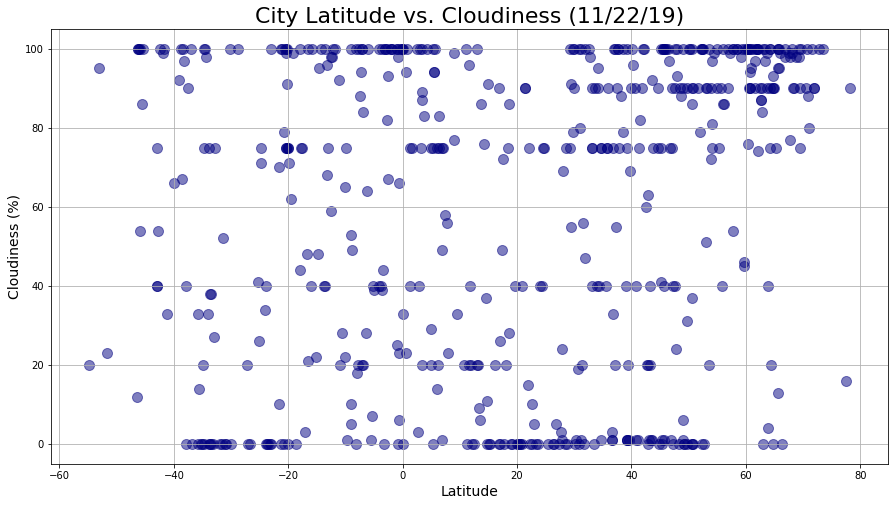

In [51]:
# create plot
ax = weather_data.plot(kind='scatter', x="Lat", y= "Cloudiness",
             color="navy",s=100,marker='o',alpha=.5, figsize=(15, 8)  )

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('City Latitude vs. Cloudiness (11/22/19)',fontsize= 22)
ax.set_xlabel("Latitude",fontsize= 14)
ax.set_ylabel("Cloudiness (%)",fontsize= 14)

fig_1 = ax.get_figure()
fig_1.savefig("output_data/cloudiness.png")

#### Latitude vs. Wind Speed Plot

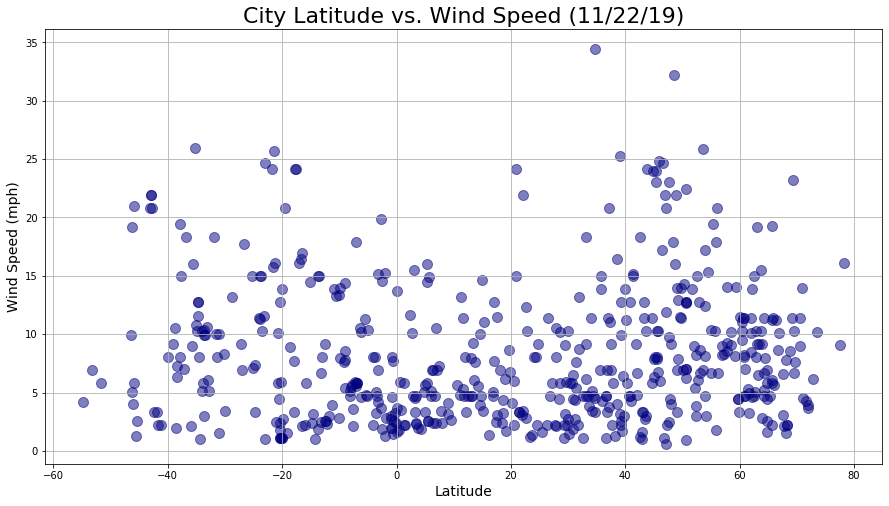

In [50]:
# create plot
ax = weather_data.plot(kind='scatter', x="Lat", y= "Wind Speed",
             color="navy",s=100,marker='o',alpha=.5, figsize=(15, 8)  )

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('City Latitude vs. Wind Speed (11/22/19)',fontsize= 22)
ax.set_xlabel("Latitude",fontsize= 14)
ax.set_ylabel("Wind Speed (mph)",fontsize= 14)

fig_1 = ax.get_figure()
fig_1.savefig("output_data/wind_speed.png")

# #Key Weather Indicator Trends in Relationship to Latitude

In this analysis, the temperatures, percent humidity, percent cloudiness and wind speeds for 549 randomly selected cities were compared to city latitude to determine what effect, if any, latitude has on weather. The following trends were observed:

1. As seen in the arch of Max Temperature vs. Latitude data chart, temperatures increase the closer a city is to the equator (0 latitude). 

2. The remaining indicators of percent humidity, percent cloudiness and wind speeds do not correlate with latitude.

3. The relationship between maximum temperature is well documented elsewhere and is due to the fact that the equator receives more direct sunlight year-round.  The further a location is from the equator the less direct sunlight it receives (source: https://www.worldatlas.com/).

4. The remaining indicators are impacted by wide range of global phenomenon.  clouds, for example, result from a number of factors, including warmer air trapping moisture and rising above cooler air (which happens across the globe regardless of latitude)(source: https://scied.ucar.edu/learning-zone/clouds/how-clouds-form).

